In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_set = pd.read_csv("../data/ml-100K/testing_set_seed123_ml100k.csv",sep=",",
    header=None,
    names=["userID", "itemID", "Rating"],)
test_set


,userID,itemID,Rating
0,101,450,4
1,101,365,2
2,101,285,4
3,101,310,3
4,101,460,4
...,...,...,...
20234,724,710,3
20235,724,130,4
20236,724,280,4
20237,724,175,4


In [4]:
all_users_tp = test_set.groupby('userID')['itemID'].apply(list).tolist()
all_users_tp.__len__()

943

In [5]:
reco_matrix[1]

NameError: name 'reco_matrix' is not defined

In [12]:

reco_matrix = np.load("../model_reco/yelp/vaecf/reco_matrix_vaecg_yelp100k_100.npy")

In [16]:
reco_matrix.shape

(1316, 100)

In [14]:
reco_matrix = reco_matrix[4]

In [15]:

from cornac.metrics import RMSE, AUC, NDCG, Precision, Recall,HitRatio

hr=HitRatio(20)
alist=[]
sum_hr=0
for u in range(reco_matrix.shape[0]):
    x=hr.compute(all_users_tp[u],reco_matrix[u][:20])
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_hr=sum_hr+x
    # print(x)
plain_hr=sum_hr/reco_matrix.shape[0]

plain_hr
# 0.5387062566277837
#0.5440084835630965


IndexError: list index out of range

In [9]:
# from NDCG import NDCG
ndcg=NDCG(20)
alist=[]
sum_ndcg=0
for u in range(reco_matrix.shape[0]):
    x=ndcg.compute(all_users_tp[u],reco_matrix[u][:20])
    
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_ndcg=sum_ndcg+x
    # print(x)
plain_ndcg=sum_ndcg/reco_matrix.shape[0]

plain_ndcg
# 0.06877010356676778

0.039744143942476204

In [16]:
all_pds =[]
reco_matrix_fair=[]
sens="age"
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_1.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_2.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_3.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_4.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_5.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_6.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_7.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_8.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_9.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_10.npy"))
# all_pds.append(pd.read_csv("../results.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_1.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/neumf/{sens}_1.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/neumf/{sens}_2.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/neumf/{sens}_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/neumf/{sens}_4.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/neumf/{sens}_5.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/neumf/{sens}_6.csv",sep=",",))
# results/reco_mat_test.npy
for j in range(len(all_pds)):
    reco_m =[]
    for i in range(all_pds[j].__len__()):
        reco_m.append(np.array(all_pds[j].iloc[i][1:]))
    reco_matrix_fair.append(reco_m)
    



In [11]:
# rec=np.load("../results/reco_mat_test.npy")
# reco_matrix_fair.append(rec)


In [12]:
reco_matrix_fair[1][0]

array([133, 321,  49, 422, 357, 389,  89,  92, 597, 684,  71, 367, 355,
       431, 166, 606, 489, 520, 377, 725])

In [17]:

hr=HitRatio(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

hrlist

[0.5365853658536586,
 0.5302226935312832,
 0.5524920466595971,
 0.5556733828207847,
 0.5673382820784729,
 0.5556733828207847]

In [18]:

hr=NDCG(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

hrlist

[0.07053358518459744,
 0.068259755557447,
 0.06796920558388728,
 0.06818297171862969,
 0.06850559561860352,
 0.06845765866885763]

In [15]:
reco_matrix_fair[2][0]

array([133, 321,  49, 357, 389,  92,  89,  96,  71, 422, 180, 307, 597,
       254,  52, 367, 355, 684, 447, 431])

In [16]:
xpoints.__len__()

NameError: name 'xpoints' is not defined

ValueError: x and y must have same first dimension, but have shapes (12,) and (5,)

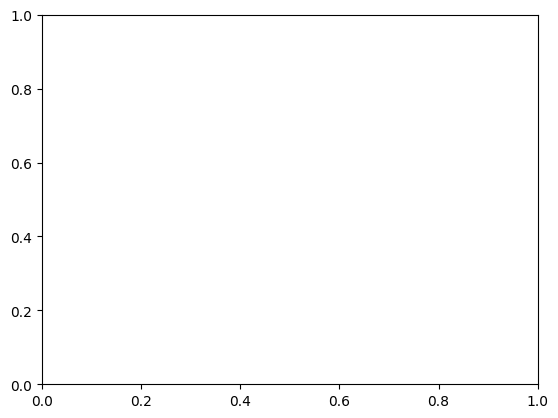

In [17]:
xpoints = [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.3,0.4,0.5,0.6]
ypoints = hrlist

plt.plot(xpoints, ypoints)
plt.show()

In [10]:
movies = pd.read_csv(
    "../data/ml-100K/i_id_mapping_genre.csv",
    sep="\t",
    names=[
        "item_id",
        "Name",
        "genres",
        "itemID"
    ],
    header=0,
    # encoding="latin-1",
)
movies = movies.drop(columns=["item_id"])
movies = movies.sort_values(by="itemID")
unique_genres = [
    "Action",
    "Thriller",
    "Romance",
    "Western",
    "Children's",
    "Mystery",
    "Fantasy",
    "Film-Noir",
    "Documentary",
    "Comedy",
    "Adventure",
    "Sci-Fi",
    "Horror",
    "Crime",
    "Musical",
    "War",
    "Animation",
    "Drama",
]
for genre in unique_genres:
    movies[genre] = 0
    
for index, row in movies.iterrows():
    genres = row["genres"].split("|")

    for genre in genres:
        movies.at[index, genre] = 1


movies

users = pd.read_csv("../data/ml-100k/u_id_mapping_demographic_.csv", sep="\t")
users = users.sort_values(by="userID")

# users = users.drop(columns=users.columns[0])
gender_map = {"M": 0, "F": 1}
users["Gender"] = users["Gender"].map(gender_map)
user_features_numpy = users.to_numpy()
users



,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,196,49,0,writer,55105,0,20
185,186,39,1,executive,00000,1,6
21,22,25,0,writer,40206,2,20
243,244,28,0,technician,80525,3,19
165,166,47,0,educator,55113,4,3
...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18
935,936,24,0,other,32789,939,13
929,930,28,1,scientist,07310,940,17
919,920,30,1,artist,90008,941,1


In [11]:
users

,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,196,49,0,writer,55105,0,20
185,186,39,1,executive,00000,1,6
21,22,25,0,writer,40206,2,20
243,244,28,0,technician,80525,3,19
165,166,47,0,educator,55113,4,3
...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18
935,936,24,0,other,32789,939,13
929,930,28,1,scientist,07310,940,17
919,920,30,1,artist,90008,941,1


In [12]:
# age_map = { 0:  "Under 18",
# 	 1:  "18-24",
# 	 2:  "25-34",
# 	 3:  "35-44",
# 	 4:  "45-49",
# 	 5:  "50-55",
# 	 6:  "56+"} #we will follow the same age amp for all dataset
import os
os.chdir("/Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes")

from metrics.utils import map_age
users["Age_Code"] = users["Age"].apply(map_age)
users


,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code,Age_Code
195,196,49,0,writer,55105,0,20,4
185,186,39,1,executive,00000,1,6,3
21,22,25,0,writer,40206,2,20,2
243,244,28,0,technician,80525,3,19,2
165,166,47,0,educator,55113,4,3,4
...,...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18,2
935,936,24,0,other,32789,939,13,1
929,930,28,1,scientist,07310,940,17,2
919,920,30,1,artist,90008,941,1,2


In [13]:
pwd

'/Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes'

In [14]:
reco_matrix[0].__len__()

100

In [15]:
from mymetrics.GenrePrecisionMulti import GenrePrecisionMulti
from mymetrics.GenreNDCGMulti import GenreNDCGMulti
from mymetrics.GenreNDCG import GenreNDCG
####Import Metrics####
# from mymetrics.GenrePrecision import GenrePrecision

top_k = 20
###intialize them
gp = GenrePrecisionMulti(users, unique_genres, top_k)
gn = GenreNDCGMulti(users, unique_genres, top_k)
gn_old = GenreNDCG(users, unique_genres, top_k)


In [16]:
reco_matrix[0].shape
# new_rmatrix = np.
new_rmatrix = np.zeros(( 943, 20), dtype=int)
for i in range(943):
    new_rmatrix[i]=reco_matrix[i][:20]
new_rmatrix.shape


(943, 20)

In [20]:
gp_plain = gp.compute(new_rmatrix, movies, "Occupation_Code")
gp_plain

(0.16884221790689868,
 array([0.01934422, 0.01035326, 0.00835896, 0.00470912, 0.00268344,
        0.00597683, 0.00053417, 0.00623821, 0.00556398, 0.00962555,
        0.00902079, 0.01478647, 0.00519944, 0.00866751, 0.00483545,
        0.01260901, 0.00845561, 0.0318802 ]))

In [18]:
gn_plain = gn.compute(new_rmatrix, movies, "Age_Code")
gn_plain

(0.04849208741589864,
 array([0.00578313, 0.00233184, 0.00044753, 0.00072238, 0.00048575,
        0.00200492, 0.00016626, 0.00119645, 0.00167211, 0.00256567,
        0.00310145, 0.00486757, 0.00082827, 0.00250078, 0.00072374,
        0.00110272, 0.00107443, 0.01691708]))

In [17]:
gn_old_plain = gn_old.compute(new_rmatrix, movies)
gn_old_plain
# print(sum(abs(gn_old_plain)))

array([ 5.25264735e-03,  1.98570240e-03, -3.29212904e-03,  9.03152599e-04,
       -9.87766530e-04,  1.43307737e-04, -9.24976256e-05, -7.18431594e-05,
       -8.79189710e-04, -4.75898369e-03,  4.23212135e-03,  5.36479476e-03,
        6.05845109e-05,  4.44645088e-03, -4.48434565e-03,  2.42991275e-03,
        5.32973386e-04, -1.07848923e-02])

In [19]:
unique_genres

['Action',
 'Thriller',
 'Romance',
 'Western',
 "Children's",
 'Mystery',
 'Fantasy',
 'Film-Noir',
 'Documentary',
 'Comedy',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Crime',
 'Musical',
 'War',
 'Animation',
 'Drama']

In [26]:
(0.0891543564230131-0.0726653727698504)/0.0891543564230131


0.18494871495596887

In [29]:
i=0
xlist=[]
for r in reco_matrix_fair:
    i=i+1
    x=gp.compute(np.array(r), movies, "Age_Code")
    xlist.append(x[0])
    # print(x)
    print(f"{x[0]} is the bias score for b={i}")


0.18417444804850897 is the bias score for b=1
0.12323596029777029 is the bias score for b=2
0.0821085039737307 is the bias score for b=3
0.05158259290965664 is the bias score for b=4
0.03544534373101079 is the bias score for b=5
0.02958706557218475 is the bias score for b=6


In [30]:
i=0
xlist=[]
for r in reco_matrix_fair:
    i=i+1
    x=gn.compute(np.array(r), movies, "Age_Code")
    xlist.append(x[0])
    # print(x)
    print(f"{x[0]} is the bias score for b={i}")


0.0606284611217356 is the bias score for b=1
0.04023058495011194 is the bias score for b=2
0.02714442325060554 is the bias score for b=3
0.01747127936432969 is the bias score for b=4
0.012452989078672825 is the bias score for b=5
0.011313804030251734 is the bias score for b=6


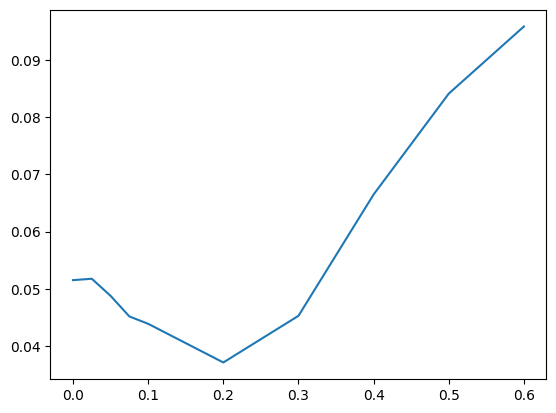

In [42]:
xpoints = [0,0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6]
ypoints = [0.0515]+xlist

plt.plot(xpoints, ypoints)
plt.show()

In [43]:
(0.051574973119749255-0.0370959579392415)/0.051574973119749255

0.2807372317362081

In [ ]:
0.05191576002770031 is the bias score for b=0.1
0.05671085050935802 is the bias score for b=0.2
0.053943241667122235 is the bias score for b=0.3

In [ ]:
occ
0.14814030434003325 is the bias score for b=0.1
0.138774267701761 is the bias score for b=0.2
0.12251404848859358 is the bias score for b=0.3
0.10578634427741243 is the bias score for b=0.4
0.053056267841701796 is the bias score for b=0.6

NameError: name 'occ' is not defined

In [38]:
for i in range(5):
    print(.1+0.025*i)
    
# user 0 u_calibrate [289, 49, 357, 489, 189, 60, 24, 157, 1, 89, 360, 645, 95, 52, 133, 148, 31, 139, 101, 200]


0.1
0.125
0.15000000000000002
0.17500000000000002
0.2


In [32]:
reco_matrix_fair[3][0]

array([289,  49, 357, 489, 157, 189,  60,   1,  89,  24, 645, 360,  95,
        52, 133,  31, 148, 139, 200, 101])

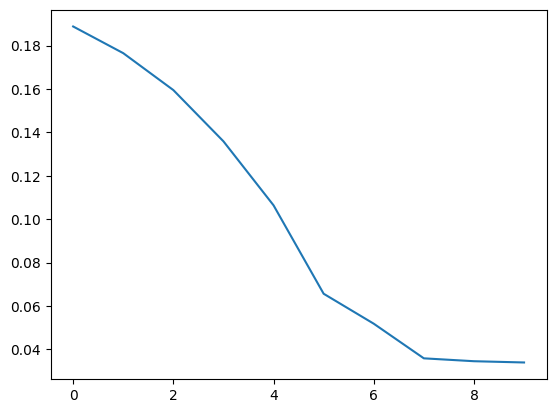

In [23]:
xpoints = list(range(len(hrlist)))
ypoints = xlist

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
print("+"*50)
print("for equation \n (1 - l - b) * sum of scores for selected items (reco)\n - l * kl div of past genre prop x reco genre prop\n - b * kl div of past gender genre prop x reco genre prop)")
print("+"*50)
data = [
    ["      ","l=.29 b=.69", "l=.49 b=.49" , "l=.69 b=.29" ,"plain"], 
    ["Hitratio@10",  round(hrl29b69,4),round(hrl49b49,4), round(hrl69b29,4),round(plain_hr,4)],                              
    ["Gender Bias", round(sum(abs(gp_1)),4),round(sum(abs(gp_2)),4),round(sum(abs(gp_3)),4), 0.1561],                         
]


print("{:<12} {:<15} {:<15} {:<15} {:<15}".format(*data[0]))  
print("-" * 50)                                      
for row in data[1:]:                                
    print("{:<12} {:<15} {:<15} {:<15} {:<15}".format(*row))
    
print("+"*50)
print("for equation \n (1 - l - b) * sum of scores for selected items (reco)\n - l * kl div of past genre prop x reco genre prop\n - b * kl div of recommended gender genre prop x reco genre prop)")
print("+"*50)
data = [
    ["      ", "l=.49 b=.49" , "l=.69 b=.29" , "l=.29 b=.29" ,"plain"], 
    ["Hitratio@10",round(hr_recol49b49,4), round(hr_recol69b29,4),round(hr_recol29b29,4),round(plain_hr,4)],                              
    ["Gender Bias",round(sum(abs(gp_reco_1)),4),round(sum(abs(gp_reco_2)),4),round(sum(abs(gp_reco_3)),4), 0.1561],                         
]


print("{:<12} {:<15} {:<15} {:<15} {:<15} ".format(*data[0]))  
print("-" * 50)                                      
for row in data[1:]:                                
    print("{:<12} {:<15} {:<15} {:<15} {:<15} ".format(*row))



++++++++++++++++++++++++++++++++++++++++++++++++++
for equation 
 (1 - l - b) * sum of scores for selected items (reco)
 - l * kl div of past genre prop x reco genre prop
 - b * kl div of past gender genre prop x reco genre prop)
++++++++++++++++++++++++++++++++++++++++++++++++++


NameError: name 'hrl29b69' is not defined